In [19]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
en_items = pd.read_csv('odeuropa_enriched_april30th-edited.csv', index_col='item_id')
en_items.head()

,Unnamed: 0,id,graph,label,source_id,source_label,source_url,source_date,source_language,relevantExcerpt,...,excerpt_value,words,year,sentiment,excerpt_value_cleaned,source_label_cleaned,geoname_id,countries,final_country_code,final_country_name
item_id,,,,,,,,,,,,,,,,,,,,,
0,0,http://data.odeuropa.eu/smell/a09e1c3c-f023-5e...,http://data.odeuropa.eu/british-library,smell,http://data.odeuropa.eu/source/56c5cda7-750c-5...,Geschichte der Stadt und Bäder zu Baden [in C...,NaN,1880,en,http://data.odeuropa.eu/source/56c5cda7-750c-5...,...,& # 34 ; Owd Siah waved his as he termed a thi...,"['sniffing', 'the party', 'betimes']",1880,0.088636,34 owd siah waved termed thick knotty meet meb...,geschichte der stadt und bäder zu baden canto...,10179318,['IR'],IR,Iran
1,1,http://data.odeuropa.eu/smell/a09e1c3c-f023-5e...,http://data.odeuropa.eu/british-library,smell,http://data.odeuropa.eu/source/56c5cda7-750c-5...,Geschichte der Stadt und Bäder zu Baden [in C...,NaN,1880,en,http://data.odeuropa.eu/source/56c5cda7-750c-5...,...,179 With her arms linked in those of Lucy and ...,"['Bartlett', 'perfume', 'scent', 'very odorous...",1880,-0.071652,179 arm linked lucy phœbe louise following lit...,geschichte der stadt und bäder zu baden canto...,10179318,['IR'],IR,Iran
2,2,http://data.odeuropa.eu/smell/a09e1c3c-f023-5e...,http://data.odeuropa.eu/british-library,smell,http://data.odeuropa.eu/source/56c5cda7-750c-5...,Geschichte der Stadt und Bäder zu Baden [in C...,NaN,1880,en,http://data.odeuropa.eu/source/56c5cda7-750c-5...,...,104 pictures : Eccho forth your grones through...,"['stench', 'noysome', 'his', 'crawling']",1880,-0.062500,104 picture eccho forth grones hollow truncke ...,geschichte der stadt und bäder zu baden canto...,10179318,['IR'],IR,Iran
3,3,http://data.odeuropa.eu/smell/a09e1c3c-f023-5e...,http://data.odeuropa.eu/british-library,smell,http://data.odeuropa.eu/source/56c5cda7-750c-5...,Geschichte der Stadt und Bäder zu Baden [in C...,NaN,1880,en,http://data.odeuropa.eu/source/56c5cda7-750c-5...,...,"Nothing , perhaps , sends up the quicksilver o...",['fragrant'],1880,0.083333,nothing perhaps sends quicksilver sphits highe...,geschichte der stadt und bäder zu baden canto...,10179318,['IR'],IR,Iran
4,4,http://data.odeuropa.eu/smell/a09e1c3c-f023-5e...,http://data.odeuropa.eu/british-library,smell,http://data.odeuropa.eu/source/56c5cda7-750c-5...,Geschichte der Stadt und Bäder zu Baden [in C...,NaN,1880,en,http://data.odeuropa.eu/source/56c5cda7-750c-5...,...,open space I sent forth a shout of joy that ec...,"['scent', 'thy', 'so much sharper']",1880,0.202273,open space sent forth shout joy echoed mountai...,geschichte der stadt und bäder zu baden canto...,10179318,['IR'],IR,Iran


In [3]:
columns_to_drop = ['Unnamed: 0', 'excerpt_id', 'excerpt_value', 'source_url', 'source_id', 'source_label', 'source_date', 'relevantExcerpt', 'geoname_id', 'countries', 'sentiment', 'time', 'place', 'id']
en_items.drop(columns=columns_to_drop, inplace=True)

In [6]:
en_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78873 entries, 0 to 78872
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   graph                  78873 non-null  object
 1   label                  78873 non-null  object
 2   source_language        78873 non-null  object
 3   adjective              44752 non-null  object
 4   emotion                841 non-null    object
 5   smellSource            47389 non-null  object
 6   carrier                7745 non-null   object
 7   words                  78873 non-null  object
 8   year                   78873 non-null  int64 
 9   excerpt_value_cleaned  78873 non-null  object
 10  source_label_cleaned   78873 non-null  object
 11  final_country_code     78873 non-null  object
 12  final_country_name     78873 non-null  object
dtypes: int64(1), object(12)
memory usage: 8.4+ MB


In [9]:
en_items['carrier']

item_id
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
78868    NaN
78869    NaN
78870    NaN
78871    NaN
78872    NaN
Name: carrier, Length: 78873, dtype: object

In [11]:
en_items['smellSource'].dropna().unique()

array(["[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/15', 'label': 'Beer'}]",
       "[{'id': 'http://data.odeuropa.eu/vocabulary/fragrant-spaces/98', 'label': 'Sewer'}]",
       "[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/226', 'label': 'Hyacinth'}, {'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/258', 'label': 'Jasmine'}]",
       "[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/138', 'label': 'Rose'}]",
       "[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/258', 'label': 'Jasmine'}]",
       "[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/227', 'label': 'Tobacco'}]",
       "[{'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/476', 'label': 'Wood'}, {'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/558', 'label': 'Fragrance / Cosmetic'}, {'id': 'http://data.odeuropa.eu/vocabulary/olfactory-objects/536', 'label': 'Ointment'}, {'id': 'http://data.odeuropa.eu/vocabulary/ol

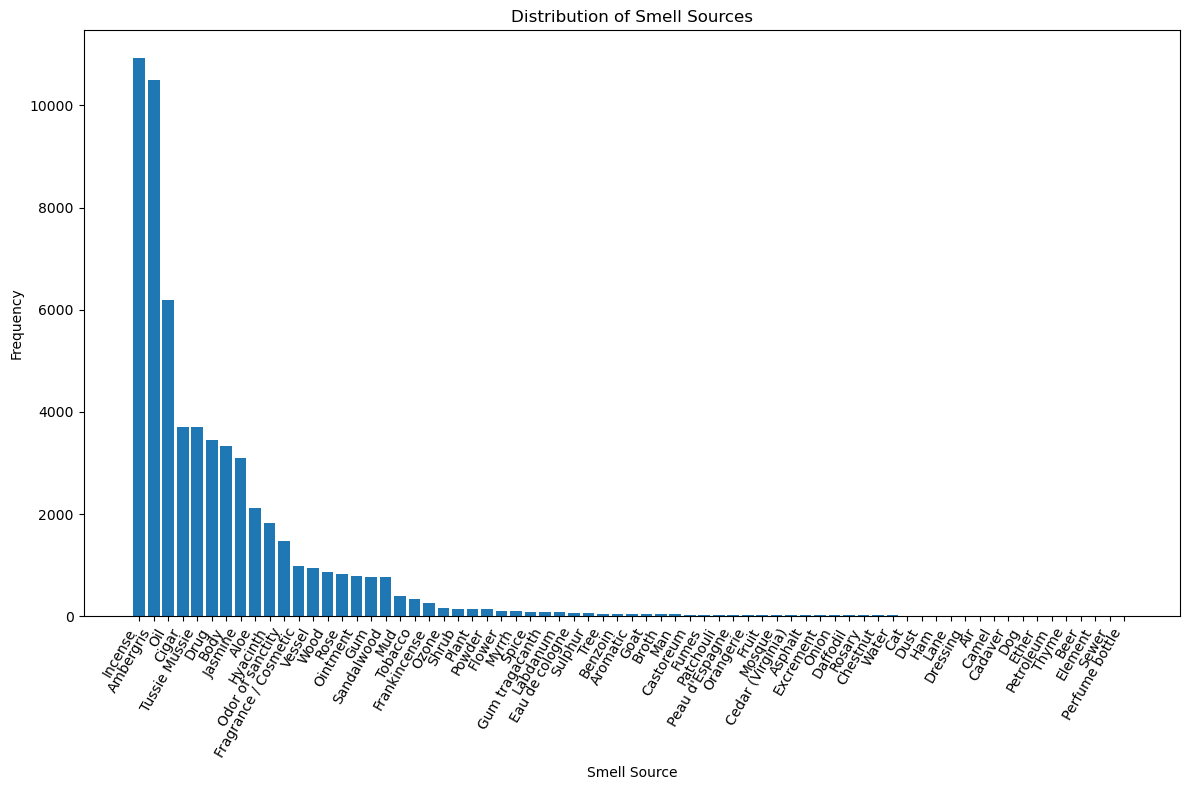

In [18]:
def extract_labels(item):
    try:
        item_list = ast.literal_eval(item)
        labels = [obj['label'] for obj in item_list]
        return labels
    except (SyntaxError, ValueError):
        return [] if pd.isna(item) else [item]

en_items['smellSource_cleaned'] = en_items['smellSource'].apply(extract_labels)

flat_labels = [label for sublist in en_items['smellSource_cleaned'] for label in sublist]

label_counts = pd.Series(flat_labels).value_counts()

plt.figure(figsize=(12, 8))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Smell Source')
plt.ylabel('Frequency')
plt.title('Distribution of Smell Sources')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [20]:
en_items['carrier_cleaned'] = en_items['carrier'].apply(extract_labels)

In [21]:
en_items['carrier_cleaned']

item_id
0        []
1        []
2        []
3        []
4        []
         ..
78868    []
78869    []
78870    []
78871    []
78872    []
Name: carrier_cleaned, Length: 78873, dtype: object

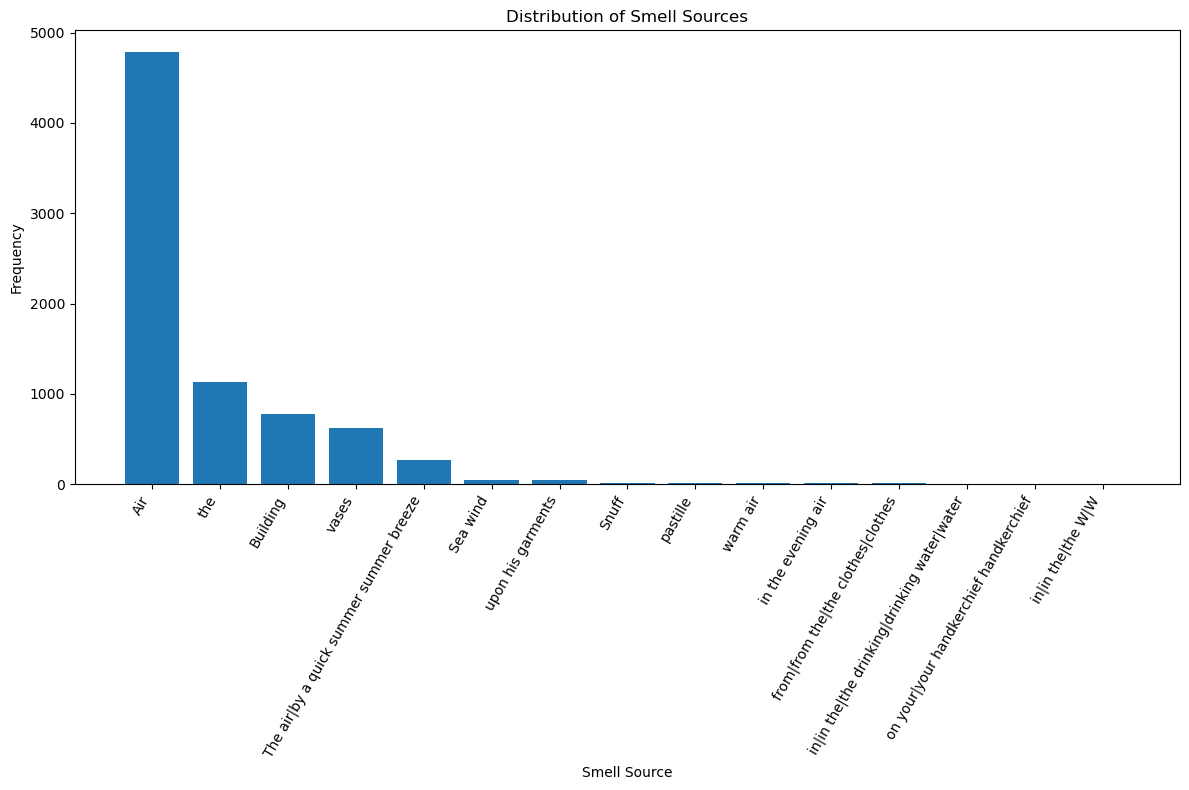

In [23]:
flat_labels_carrier = [label for sublist in en_items['carrier_cleaned'] for label in sublist]
label_counts_carrier = pd.Series(flat_labels_carrier).value_counts()
plt.figure(figsize=(12, 8))
plt.bar(label_counts_carrier.index, label_counts_carrier.values)
plt.xlabel('Smell Source')
plt.ylabel('Frequency')
plt.title('Distribution of Smell Sources')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()
